# Mandelbrot set
This notebook generates the results used in the report for the first assignment of the course 'Stochastic Simulation'.

**Authors**:

1. Divya
- Affiliation: MSc Computational Science, University of Amsterdam
- Email: 
- Student Number: 

2. K. López
- Affiliation: MSc Computational Science, University of Amsterdam
- Email: kenia.lopez.sotomayor@student.uva.nl
- Student Number: 12965081

## Section 1: Implementation


In [10]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import qmc


The Mandelbrot set is the set of those complex numbers c for which the function z = z * z + c does not go to infinite. 
A high number of iterations indicates slower divergence and a point that stays within bounds. 
This means that for these points, the iterative function z takes more iterations before determining that the point diverges and moves away from the set.

https://github.com/KeniaLS/Stoc_Sim_Assignment1.gitgit 

Approximated area of the Mandelbrot set: 1.514376
The number total number of points within the set: 42066


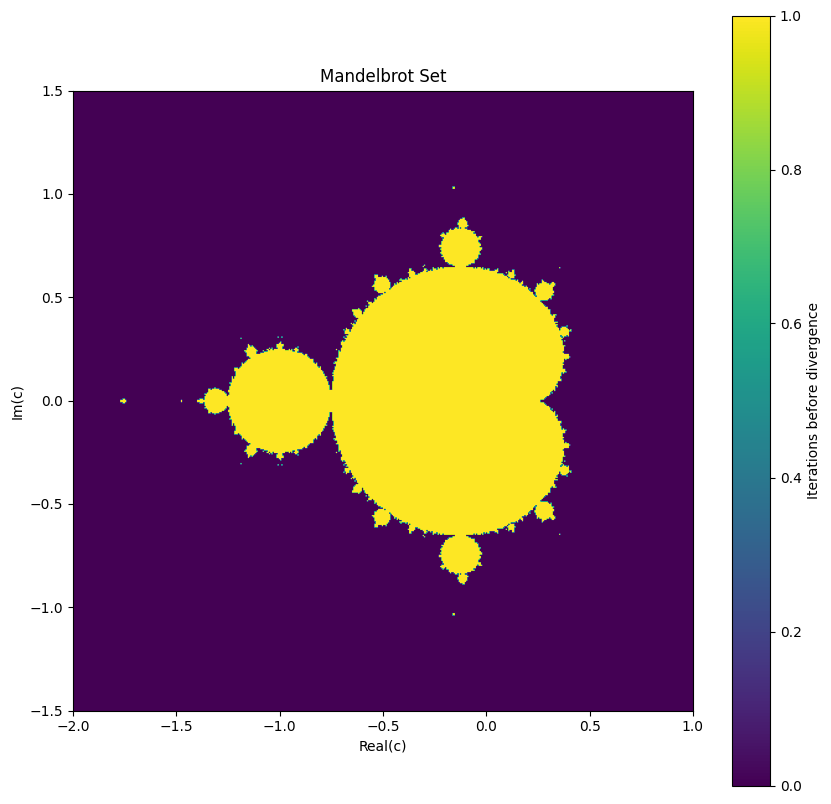

In [12]:
def mandelbrot(c, max_iter):
    '''Function that asseses if the complex number diverges after some number iterations.
    Expects: c and max_iter, a complex number and the maximum number of iterations to check for divergence.
    Modifies: nothing
    Returns: Number boolean True if the complex number does not diverege afeter a max_iter'''
    z = 0
    for n in range(max_iter):
        z = z * z + c
        if abs(z) > 2:  # Check for divergence. If the magnitude of c is greater than 2, abs(z) > 2, then the sequence will diverge to infinity.
            return False  # Point c not in Mandelbrot set
        
    return True  # Point c in Mandelbrot set


def mandelbrot_plot():
    max_iter = 255
    x_min, x_max = -2.0, 1.0
    y_min, y_max = -1.5, 1.5
    width, height = 500, 500 #Resolution of the image


    total_points = width * height
    points_inside_set = 0

    mandelbrot_image = np.zeros((width, height))
    for x in range(width):
        for y in range(height):
            real = x * (x_max - x_min) / (width - 1) + x_min
            imag = y * (y_max - y_min) / (height - 1) + y_min
            c = complex(real, imag)

            mandelbrot_image[x, y] = mandelbrot(c, max_iter)

            if mandelbrot(c, max_iter) == True:
                points_inside_set += 1

    area_ratio = points_inside_set / total_points
    total_area = (x_max - x_min) * (y_max - y_min)
    estimated_area = area_ratio * total_area
    A_M = estimated_area


    print (f"Approximated area of the Mandelbrot set: {A_M}")
    print (f"The number total number of points within the set: {points_inside_set}")


    plt.figure(figsize=(10, 10))
    plt.imshow(mandelbrot_image.T, cmap='viridis', extent=(x_min, x_max, y_min, y_max))
    plt.xlabel('Real(c)')
    plt.ylabel('Im(c)')
    plt.title('Mandelbrot Set')
    plt.colorbar(label='Iterations before divergence')
    plt.show()

    #estimated_area, points_inside = mandelbrot_area(1000)
    #print("Estimated Area:", estimated_area)
    #print("Points Inside Mandelbrot Set:", points_inside)

mandelbrot_plot()
